# PUNTO 1 (RUNGE - KUTTA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def f(x,y):
    return x + 2*y

In [3]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [4]:
N = 10
t = np.linspace(0,1,N)

In [5]:
h = t[1] - t[0]

In [6]:
yext = Solucion(t)

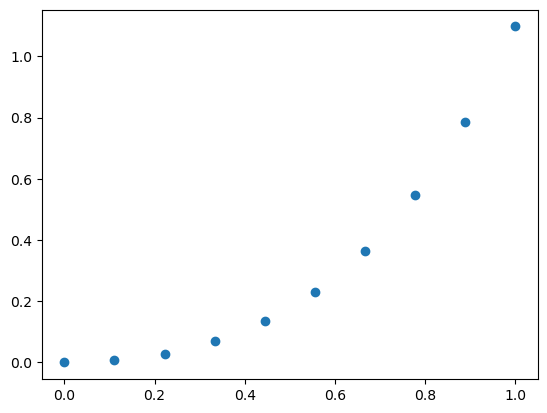

In [7]:
plt.scatter(t,yext)

In [8]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1

In [9]:
y1 = np.zeros_like(t)
y1[0] = 0

In [10]:
GetEuler(t,y1,h)

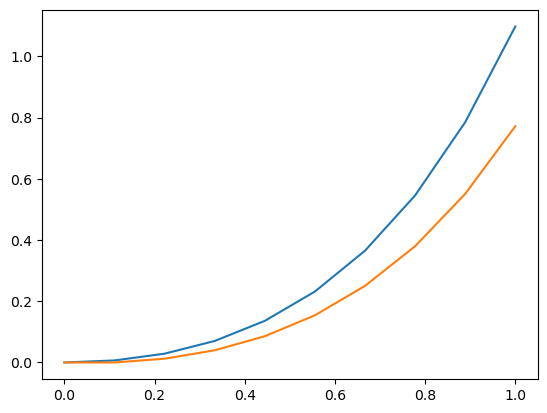

In [11]:
plt.plot(t,yext)
plt.plot(t,y1)

In [12]:
def fc(z):
    return 1j*z

In [13]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)

In [14]:
theta = 0.

N = 100
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

In [15]:
Solucion1[-1,1]

(1.2177068419842307-0.010044860504615213j)

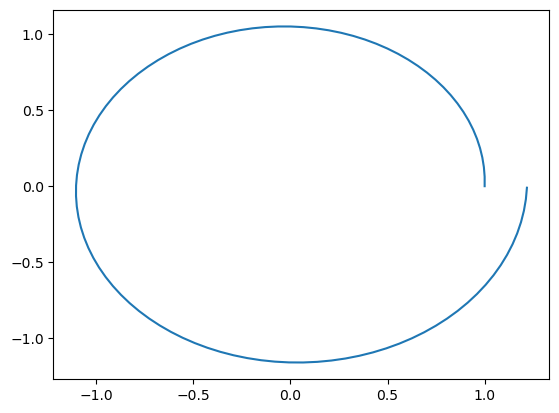

In [16]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

plt.plot(Re,Im)

In [17]:
def GetEuler2(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1] + h*k1)
        
        y[i] = y[i-1] + 0.5*h*(k1+k2)

In [18]:
def f(x,y):
    return x + 2*y

In [19]:
y2 = np.zeros_like(t)
y2[0] = 0.

In [20]:
GetEuler2(t,y2,h)

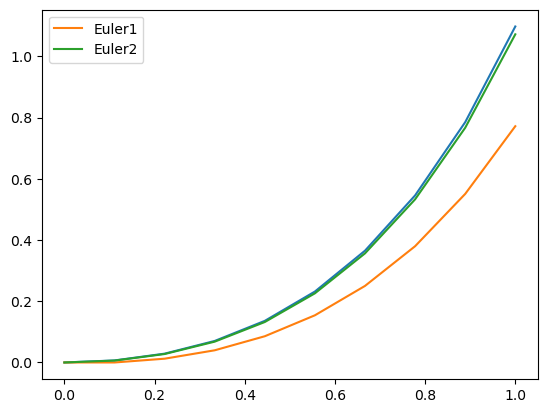

In [21]:
plt.plot(t,yext)
plt.plot(t,y1,label='Euler1')
plt.plot(t,y2,label='Euler2')
plt.legend()

In [22]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [23]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

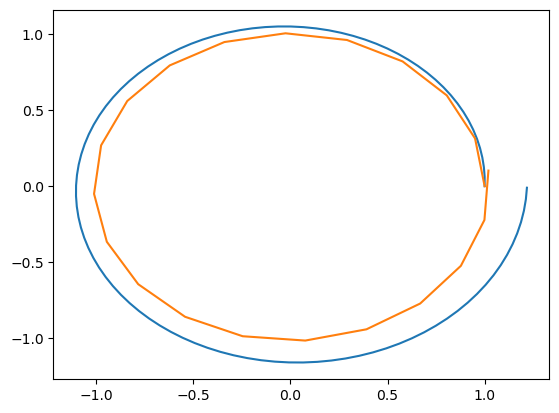

In [24]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])


plt.plot(Re,Im)
plt.plot(Re2,Im2)

# Usando python scipy

In [25]:
def System(r,t,beta,gamma):
    
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]
    
    return [dsdt,didt]

In [26]:
t = np.linspace(0,30,100)

In [27]:
beta = 0.002
gamma = 0.5

In [28]:
r0 = [1000,1]
r = integrate.odeint( System, r0, t, args=(beta,gamma) )

# Implementacion Euler - Sistema de ecuaciones diferenciales

In [29]:
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

In [30]:
def GetEulerSystem(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        S[i] = S[i-1] + h*K1[0]
        I[i] = I[i-1] + h*K1[1]
        
    return S,I

# Orden 2

In [31]:
def GetEuler2System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        
        S[i] = S[i-1] + 0.5*h*(K1[0]+K2[0])
        I[i] = I[i-1] + 0.5*h*(K1[1]+K2[1])
        
    return S,I

In [32]:
S1,I1 = GetEulerSystem(f0,f1,r0,t)
S2,I2 = GetEuler2System(f0,f1,r0,t)

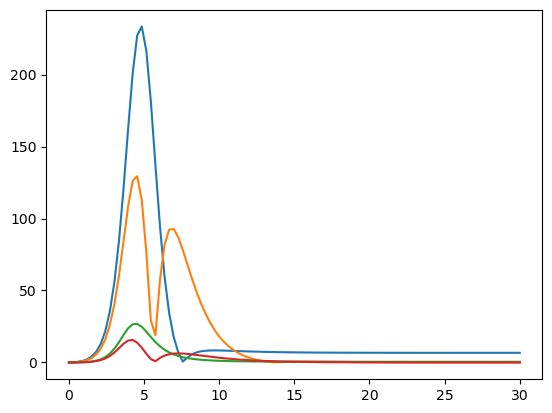

In [33]:
plt.plot(t,np.abs(r[:,0]-S1))
plt.plot(t,np.abs(r[:,1]-I1))
plt.plot(t,np.abs(r[:,0]-S2))
plt.plot(t,np.abs(r[:,1]-I2))

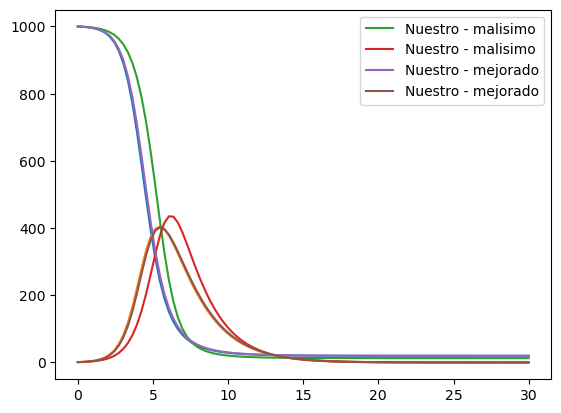

In [34]:
plt.plot(t,r[:,0])
plt.plot(t,r[:,1])
plt.plot(t,S1,label='Nuestro - malisimo')
plt.plot(t,I1,label='Nuestro - malisimo')
plt.plot(t,S2,label='Nuestro - mejorado')
plt.plot(t,I2,label='Nuestro - mejorado')
plt.legend()

# ORDEN 3

In [35]:
def GetEuler3System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        xn = S[i-1]
        yn = I[i-1]

        K1[0] = f0(xn, yn, beta, gamma)
        K1[1] = f1(xn, yn, beta, gamma)

        K2[0] = f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)
        K2[1] = f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)

        K3[0] = f0(xn + h * K1[0], yn - h * K1[1] + 2 * h * K2[1], beta, gamma)
        K3[1] = f1(xn + h * K1[0], yn - h * K1[1] + 2 * h * K2[1], beta, gamma)

        S[i] = xn + (h / 6) * (K1[0] + 4 * K2[0] + K3[0])
        I[i] = yn + (h / 6) * (K1[1] + 4 * K2[1] + K3[1])
        
    return S,I

In [36]:
S1,I1 = GetEulerSystem(f0,f1,r0,t)
S2,I2 = GetEuler2System(f0,f1,r0,t)
S3,I3 = GetEuler3System(f0,f1,r0,t)

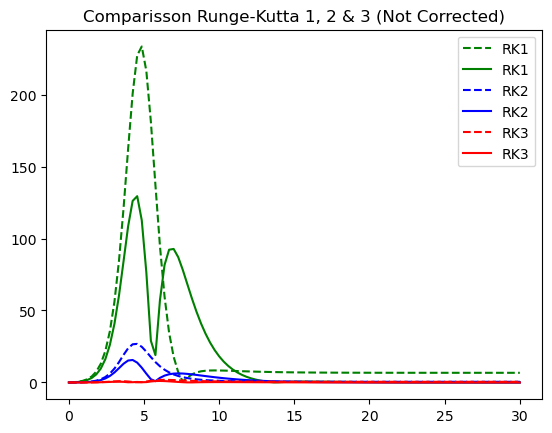

In [37]:
plt.plot(t,np.abs(r[:,0]-S1),label='RK1', color = 'green', linestyle = 'dashed')
plt.plot(t,np.abs(r[:,1]-I1),label='RK1', color = 'green')
plt.plot(t,np.abs(r[:,0]-S2),label='RK2', color = 'blue', linestyle = 'dashed')
plt.plot(t,np.abs(r[:,1]-I2),label='RK2', color = 'blue')
plt.plot(t,np.abs(r[:,0]-S3),label='RK3', color = 'red', linestyle = 'dashed')
plt.plot(t,np.abs(r[:,1]-I3),label='RK3', color = 'red')
plt.title('Comparisson Runge-Kutta 1, 2 & 3 (Not Corrected)')
plt.legend()

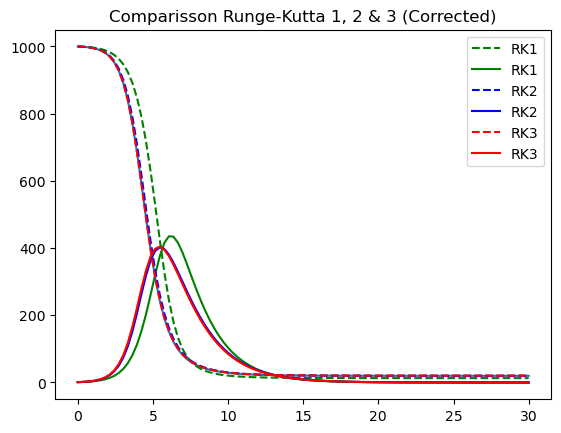

In [38]:
plt.plot(t,r[:,0])
plt.plot(t,r[:,1])
plt.plot(t,S1,label='RK1', color = 'green', linestyle = 'dashed')
plt.plot(t,I1,label='RK1', color = 'green')
plt.plot(t,S2,label='RK2', color = 'blue', linestyle = 'dashed')
plt.plot(t,I2,label='RK2', color = 'blue')
plt.plot(t,S3,label='RK3', color = 'red', linestyle = 'dashed')
plt.plot(t,I3,label='RK3', color = 'red')
plt.title('Comparisson Runge-Kutta 1, 2 & 3 (Corrected)')
plt.legend()

# ORDEN 4

In [39]:
def GetEuler4System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        xn = S[i-1]
        yn = I[i-1]

        K1[0] = f0(xn, yn, beta, gamma)
        K1[1] = f1(xn, yn, beta, gamma)

        K2[0] = f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)
        K2[1] = f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)

        K3[0] = f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K2[1], beta, gamma)
        K3[1] = f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K2[1], beta, gamma)

        K4[0] = f0(xn + h * K1[0], yn + h * K3[1], beta, gamma)
        K4[1] = f1(xn + h * K1[0], yn + h * K3[1], beta, gamma)

        S[i] = xn + (h / 6) * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        I[i] = yn + (h / 6) * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])
        
    return S,I

In [40]:
S1,I1 = GetEulerSystem(f0,f1,r0,t)
S2,I2 = GetEuler2System(f0,f1,r0,t)
S3,I3 = GetEuler3System(f0,f1,r0,t)
S4,I4 = GetEuler4System(f0,f1,r0,t)

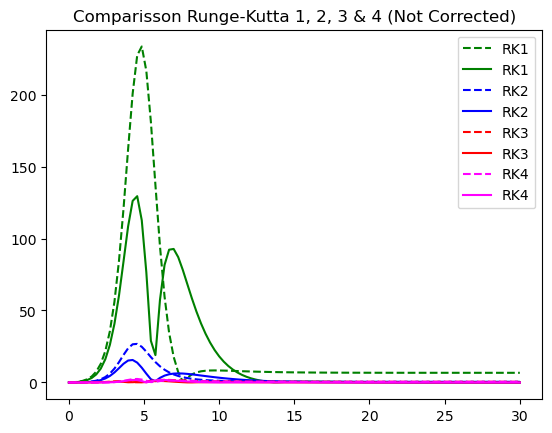

In [41]:
plt.plot(t,np.abs(r[:,0]-S1),label='RK1', color = 'green', linestyle = 'dashed')
plt.plot(t,np.abs(r[:,1]-I1),label='RK1', color = 'green')
plt.plot(t,np.abs(r[:,0]-S2),label='RK2', color = 'blue', linestyle = 'dashed')
plt.plot(t,np.abs(r[:,1]-I2),label='RK2', color = 'blue')
plt.plot(t,np.abs(r[:,0]-S3),label='RK3', color = 'red', linestyle = 'dashed')
plt.plot(t,np.abs(r[:,1]-I3),label='RK3', color = 'red')
plt.plot(t,np.abs(r[:,0]-S4),label='RK4', color = 'magenta', linestyle = 'dashed')
plt.plot(t,np.abs(r[:,1]-I4),label='RK4', color = 'magenta')
plt.title('Comparisson Runge-Kutta 1, 2, 3 & 4 (Not Corrected)')
plt.legend()

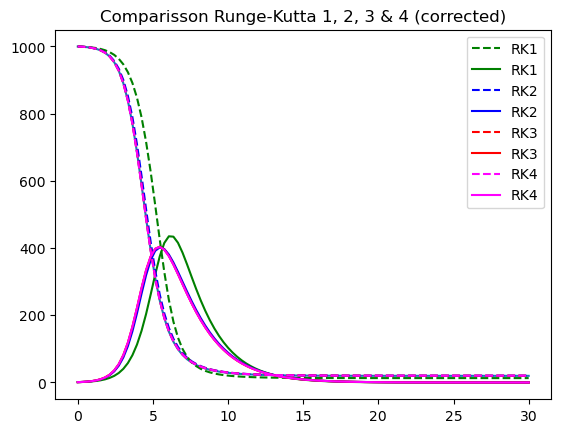

In [42]:
plt.plot(t,r[:,0])
plt.plot(t,r[:,1])
plt.plot(t,S1,label='RK1', color = 'green', linestyle = 'dashed')
plt.plot(t,I1,label='RK1', color = 'green')
plt.plot(t,S2,label='RK2', color = 'blue', linestyle = 'dashed')
plt.plot(t,I2,label='RK2', color = 'blue')
plt.plot(t,S3,label='RK3', color = 'red', linestyle = 'dashed')
plt.plot(t,I3,label='RK3', color = 'red')
plt.plot(t,S4,label='RK4', color = 'magenta', linestyle = 'dashed')
plt.plot(t,I4,label='RK4', color = 'magenta')
plt.title('Comparisson Runge-Kutta 1, 2, 3 & 4 (corrected)')
plt.legend()